In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8',]
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\PID\PID_NW_20.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,6.0,148.0,72.0,NaN,0.0,33.6,0.627,50.0
1,NaN,85.0,66.0,29.0,0.0,NaN,0.351,31.0
2,8.0,NaN,64.0,0.0,0.0,23.3,0.672,32.0
3,1.0,89.0,66.0,23.0,94.0,28.1,NaN,NaN
4,0.0,137.0,40.0,NaN,168.0,43.1,NaN,33.0
...,...,...,...,...,...,...,...,...
763,NaN,101.0,76.0,48.0,180.0,32.9,0.171,NaN
764,2.0,122.0,70.0,27.0,0.0,NaN,0.340,27.0
765,5.0,121.0,72.0,23.0,112.0,26.2,NaN,30.0
766,NaN,126.0,60.0,0.0,0.0,30.1,0.349,47.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	114
float64		column 2	190
float64		column 3	114
float64		column 4	190
float64		column 5	76
float64		column 6	228
float64		column 7	152
float64		column 8	152


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
count,654.000000,578.000000,654.000000,578.000000,692.000000,540.000000,616.000000,616.000000
mean,3.811927,118.913495,69.035168,21.162630,77.049133,31.772407,0.457961,33.128247
std,3.229332,29.351798,18.127597,14.904474,106.788187,7.193710,0.290077,11.375260
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,100.000000,64.000000,10.000000,0.000000,27.800000,0.251750,24.000000
50%,3.000000,117.000000,70.000000,23.000000,39.000000,32.050000,0.389000,29.500000
75%,6.000000,135.000000,78.000000,32.000000,125.250000,35.325000,0.600000,40.000000
max,15.000000,197.000000,114.000000,99.000000,846.000000,67.100000,2.137000,81.000000


<AxesSubplot:>

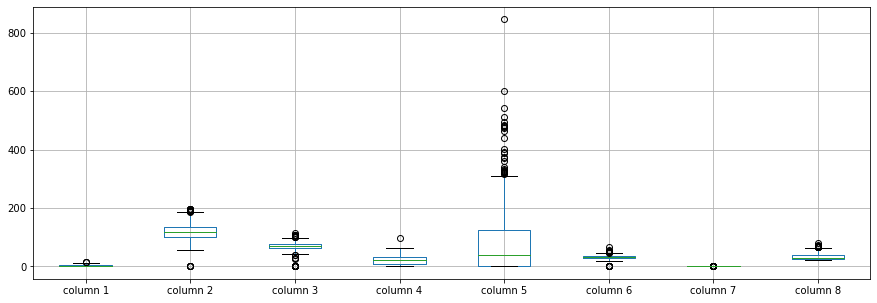

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1      3.811927
column 2    118.913495
column 3     69.035168
column 4     21.162630
column 5     77.049133
column 6     31.772407
column 7      0.457961
column 8     33.128247
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
column 1,1.000000,0.104357,0.120801,-0.028453,-0.056890,0.065106,-0.067927,0.505081
column 2,0.104357,1.000000,0.099117,-0.013613,0.317979,0.147538,0.123123,0.240408
column 3,0.120801,0.099117,1.000000,0.188608,0.104229,0.216751,0.038223,0.237835
column 4,-0.028453,-0.013613,0.188608,1.000000,0.374742,0.412419,0.151091,-0.131754
column 5,-0.056890,0.317979,0.104229,0.374742,1.000000,0.213662,0.181611,-0.106812
column 6,0.065106,0.147538,0.216751,0.412419,0.213662,1.000000,0.068157,0.019672
column 7,-0.067927,0.123123,0.038223,0.151091,0.181611,0.068157,1.000000,-0.002055
column 8,0.505081,0.240408,0.237835,-0.131754,-0.106812,0.019672,-0.002055,1.000000


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [8,8+15,8+15+15,8+15+15+15,8+15+15+15+15,8+15+15+15+15+15,8+15+15+15+15+15+15,8+15+15+15+15+15,8+15+15+15+15,8+15+15+15,8+15+15,8+15,8], vae_layer = False, seed = 8)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [8]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 341.63811620076496
Epoch: 1 , loss: 341.080525080363
Epoch: 2 , loss: 339.29175059000653
Epoch: 3 , loss: 339.57396443684894
Epoch: 4 , loss: 339.0006504058838
Epoch: 5 , loss: 337.9138952891032
Epoch: 6 , loss: 337.82124932607013
Epoch: 7 , loss: 336.05403995513916
Epoch: 8 , loss: 336.49464162190753
Epoch: 9 , loss: 332.133991877238
Epoch: 10 , loss: 333.7628968556722
Epoch: 11 , loss: 329.75085576375324
Epoch: 12 , loss: 323.71024735768634
Epoch: 13 , loss: 315.0244890848796
Epoch: 14 , loss: 305.7201801935832
Epoch: 15 , loss: 305.3932285308838
Epoch: 16 , loss: 299.16735140482587
Epoch: 17 , loss: 298.1660092671712
Epoch: 18 , loss: 296.0598710378011
Epoch: 19 , loss: 295.7753973007202
Epoch: 20 , loss: 284.12690385182697
Epoch: 21 , loss: 283.77248732248944
Epoch: 22 , loss: 283.26830832163495
Epoch: 23 , loss: 275.8275210062663
Epoch: 24 , loss: 276.158704439799
Epoch: 25 , loss: 280.000790278116

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(768, 8)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1     8.000000
column 2    99.000000
column 3    84.000000
column 4     4.439379
column 5     0.000000
column 6     6.617035
column 7     0.388000
column 8     6.670962
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\PID.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,0.000000,0.000000,0.0,-17.524654,0.0,0.000000,0.000000,0.000000
1,4.031368,0.000000,0.0,0.000000,0.0,11.948862,0.000000,0.000000
2,0.000000,-123.939541,0.0,0.000000,0.0,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.102266,-14.015229
4,0.000000,0.000000,0.0,-21.478553,0.0,0.000000,-1.839064,0.000000
...,...,...,...,...,...,...,...,...
763,-9.591772,0.000000,0.0,0.000000,0.0,0.000000,0.000000,-62.507128
764,0.000000,0.000000,0.0,0.000000,0.0,-19.079608,0.000000,0.000000
765,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.081893,0.000000
766,4.989752,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(2388.72779107019, 5776.576248839705)

In [17]:
NRMS=numerator/denominator
NRMS


0.4135196504244179

In [18]:
new_df.iloc[66,:]

column 1      1.649117
column 2    109.000000
column 3     88.000000
column 4     30.000000
column 5      0.000000
column 6     13.037769
column 7      0.855000
column 8     38.000000
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,6.000000,148.000000,72.0,17.475346,0.0,33.600000,0.627000,50.000000
1,5.031368,85.000000,66.0,29.000000,0.0,38.548862,0.351000,31.000000
2,8.000000,59.060459,64.0,0.000000,0.0,23.300000,0.672000,32.000000
3,1.000000,89.000000,66.0,23.000000,94.0,28.100000,0.269266,6.984771
4,0.000000,137.000000,40.0,13.521447,168.0,43.100000,0.448936,33.000000
...,...,...,...,...,...,...,...,...
763,0.408228,101.000000,76.0,48.000000,180.0,32.900000,0.171000,0.492872
764,2.000000,122.000000,70.0,27.000000,0.0,17.720392,0.340000,27.000000
765,5.000000,121.000000,72.0,23.000000,112.0,26.200000,0.326893,30.000000
766,5.989752,126.000000,60.0,0.000000,0.0,30.100000,0.349000,47.000000


In [20]:
imputations[-1].to_excel("PID_NW_20.xlsx", index=False, header=False)